Attribution:

Simple script to record sound from the microphone, dependencies: easy_install pyaudio 

https://gist.github.com/mabdrabo/8678538

Need to:
    
    pip install pyaudio
    

https://stackoverflow.com/questions/33513522/when-installing-pyaudio-pip-cannot-find-portaudio-h-in-usr-local-include/33821084

Since pyAudio has portAudio as a dependency, you first have to install portaudio.

    brew install portaudio    

In [1]:
# Import libraries
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from pysndfx import AudioEffectsChain
from IPython.display import Audio, display

import pyaudio
import wave

from keras.models import load_model

from keras.utils.vis_utils import plot_model
from IPython.display import Image

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from utils.bedtime import computer_sleep


# Modify notebook settings
%matplotlib inline

Using TensorFlow backend.


### Create paths to data folders and files

In [2]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save path to the folder for user-made recordings
# "external/user-recordings"
user_recordings_path = os.path.join(proj_root,
                                    "data",
                                    "external",
                                    "user-recordings")

# Save the path to the models folder
models_dir = os.path.join(proj_root,
                          "models")

# Full path for my_model.hdf5
model_path = os.path.join(models_dir, 
                          "my_model.hdf5")


In [3]:
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(proj_root, "src")
sys.path.append(src_dir)

In [4]:
global_sr = 22050 # global Sampling rate
global_n_mels = 96 # 128 # 96
global_spec_w = 173 # 128 # spectrogram width


In [5]:
# Save the path to the folder that will contain 
# the interim data sets for modeling:
# /data/interim
interim_data_dir = os.path.join(proj_root,
                                "data",
                                "interim")


new_file_name = 'classID_key.csv'
new_file_path = os.path.join(interim_data_dir,
                             new_file_name)

df_class_key = pd.read_csv(new_file_path,index_col=0)

class_key_dict = dict((row['classID'], row['class']) for _, row in df_class_key.iterrows())

In [6]:
def Record(wave_output_filename=None, record_seconds=5,
           Format=pyaudio.paInt16, channels=1, rate=22050, chunk=1024, verbose=1):
    '''
    Record audio and save to .wav file
    '''
    
    audio = pyaudio.PyAudio()

    # start Recording
    stream = audio.open(format=Format, channels=channels,
                    rate=rate, input=True, 
                    frames_per_buffer=chunk)

    if verbose:
        print("recording...")
        
    frames = []

    for i in range(0, int(rate / chunk * record_seconds)):
        data = stream.read(chunk)
        frames.append(data)
        
    if verbose:
        print("finished recording")

    # stop Recording
    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(wave_output_filename, 'wb')
    waveFile.setnchannels(channels)
    waveFile.setsampwidth(audio.get_sample_size(Format))
    waveFile.setframerate(rate)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

In [7]:
# filename for the user-made recording
filename_recording = "user_recorded_2.wav"

# Full path to the user-made recording
filepath_recording = os.path.join(user_recordings_path, 
                                  filename_recording)

print(filepath_recording)


Record(wave_output_filename=filepath_recording, record_seconds=4)

audio_path = filepath_recording
display(Audio(filename=audio_path))

../data/external/user-recordings/user_recorded_2.wav
recording...
finished recording


    I trained an image classifier with Keras and I ended up saving the model with the code

    model.save('model1.h5')

    Now when I'm actually trying to predict another image using this model, I'm using the code

    from keras.models import load_model
    from keras.preprocessing import image
    import numpy as np

    # dimensions of our images
    img_width, img_height = 231, 172

    # load the model we saved
    model = load_model('model1.h5')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # predicting images
    img = image.load_img('a.png', target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    print(classes)


# Load Model

In [9]:

# load the model we saved
model = load_model(model_path)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [10]:
model.layers

    conda install graphviz

    conda install pydot

    conda install pygraphviz

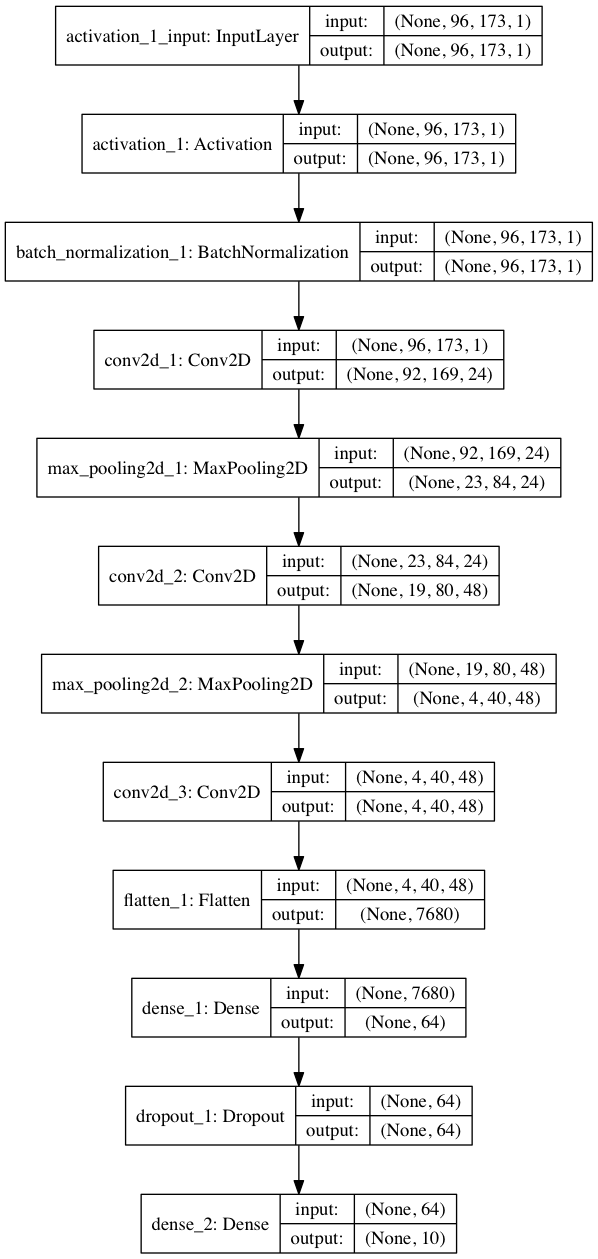

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png')

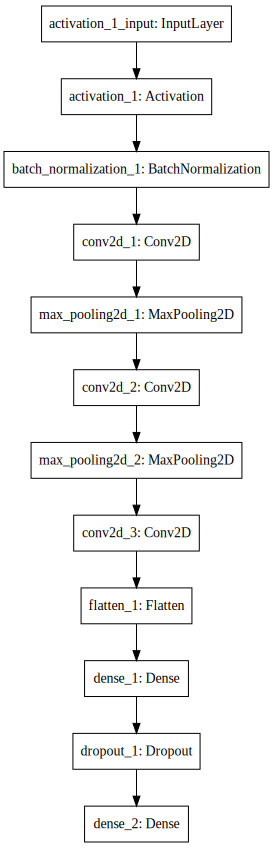

In [21]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# make prediction

../data/external/user-recordings/user_recorded_2.wav



Prediction:


classID             class     proba
0        4          drilling  0.181274
1        8             siren  0.179707
2        2  children_playing  0.129585
3        3          dog_bark  0.126825
4        5     engine_idling  0.101497
5        7        jackhammer  0.081608
6        0   air_conditioner  0.080727
7        9      street_music  0.075414
8        1          car_horn  0.024069
9        6          gun_shot  0.019296

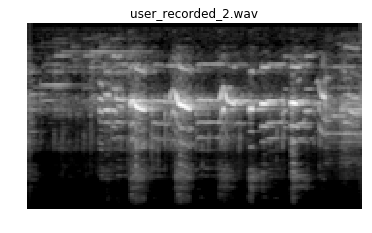

In [23]:
# filename for the user-made recording
filename_recording = "user_recorded_2.wav"

# Full path to the user-made recording
filepath_recording = os.path.join(user_recordings_path, 
                                  filename_recording)

print(filepath_recording)


Record(wave_output_filename=filepath_recording, record_seconds=4, verbose=0)

audio_path = filepath_recording
#display(Audio(filename=audio_path))



# predicting sound class
aud_array, sr = librosa.load(audio_path,sr=global_sr)
display(Audio(data=aud_array, rate=global_sr))

spec_array = librosa.logamplitude(\
                librosa.feature.melspectrogram(aud_array, 
                                               sr=global_sr,
                                               n_mels=global_n_mels),
                                  ref_power=1.0)[np.newaxis,:,:,
                                                 np.newaxis]

spec_array_full = spec_array

# Convert spectrogram array from dtype float64 to float32
#spec_array_full = spec_array_full.astype('float32')


spec_array = spec_array_full[:,:,:173,:]
#print(spec_array.shape)

plt.figure()
img = plt.imshow(spec_array[0,:,:,0], cmap='gray')
title = os.path.basename(audio_path)
plt.title(title)            
plt.axis('off')

predict_array = model.predict(spec_array, batch_size=1, verbose=0)
print('\nPrediction:')
#print('class:\t\t', classes[0])
#print('classID:\t', class_key_dict[classes[0]])

prediction_df = df_class_key.copy()
prediction_df['proba'] = predict_array[0]
prediction_df = prediction_df[['classID', 'class', 'proba']]
prediction_df.sort_values('proba', ascending=False, inplace=True)
prediction_df.reset_index(drop=True, inplace=True)
display(prediction_df)


In [9]:
# predicting sound class

# filename for the user-made recording
filename_recording = "user_recorded_8.wav"

# Full path to the user-made recording
filepath_recording = os.path.join(user_recordings_path, 
                                  filename_recording)

audio_path = filepath_recording
print(audio_path)
aud_array, sr = librosa.load(audio_path,sr=global_sr)
display(Audio(data=aud_array, rate=global_sr))


spec_array = librosa.logamplitude(\
                librosa.feature.melspectrogram(aud_array, 
                                               sr=global_sr,
                                               n_mels=global_n_mels),
                                  ref_power=1.0)[np.newaxis,:,:,
                                                 np.newaxis]

spec_array_full = spec_array


# Convert spectrogram array from dtype float64 to float32
#spec_array_full = spec_array_full.astype('float32')


spec_array = spec_array_full[:,:,:173,:]
print(spec_array.shape)

plt.figure()
img = plt.imshow(spec_array[0,:,:,0], cmap='gray')
title = os.path.basename(audio_path)
plt.title(title)            
plt.axis('off')

../data/external/user-recordings/user_recorded_8.wav


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ZacharyKneupper/Github/Audio-Classification-CNN/data/external/user-recordings/user_recorded_8.wav'

In [84]:
classes = model.predict_classes(spec_array, batch_size=10, verbose=1)
print('\nPrediction:')
print('class:\t\t', classes[0])
print('classID:\t', class_key_dict[classes[0]])

1/1 [==============================] - 0s

Prediction:
class:		 8
classID:	 siren


In [26]:

fn = "/Users/ZacharyKneupper/Music/Nine Inch Nails/With Teeth/01 All the Love in the World.mp3"

y, sr = librosa.load(fn,sr=global_sr)

In [27]:
y.shape

(6952960,)

In [43]:
display(Audio(data=y[-580000:], rate=global_sr))

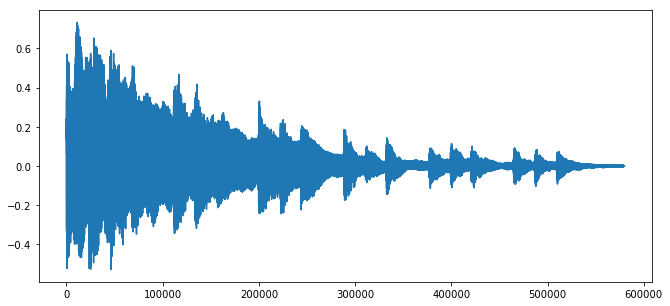

In [47]:
plt.figure(figsize=(11,5))
plt.plot(y[-580000:])

In [48]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [87]:
p = figure()

n = 4
y_var = y[-580000::n]
x_var = np.array(range(len(y_var)))  / (global_sr / n)

p.line(x_var, y_var)
show(p)